In [1]:
# 압축파일 해제

import zipfile

titanic_zip = zipfile.ZipFile('타이타닉.zip')
titanic_zip.extractall()

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.fillna({'Age' : int(train['Age'].mean())}, inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train = train.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)

In [8]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


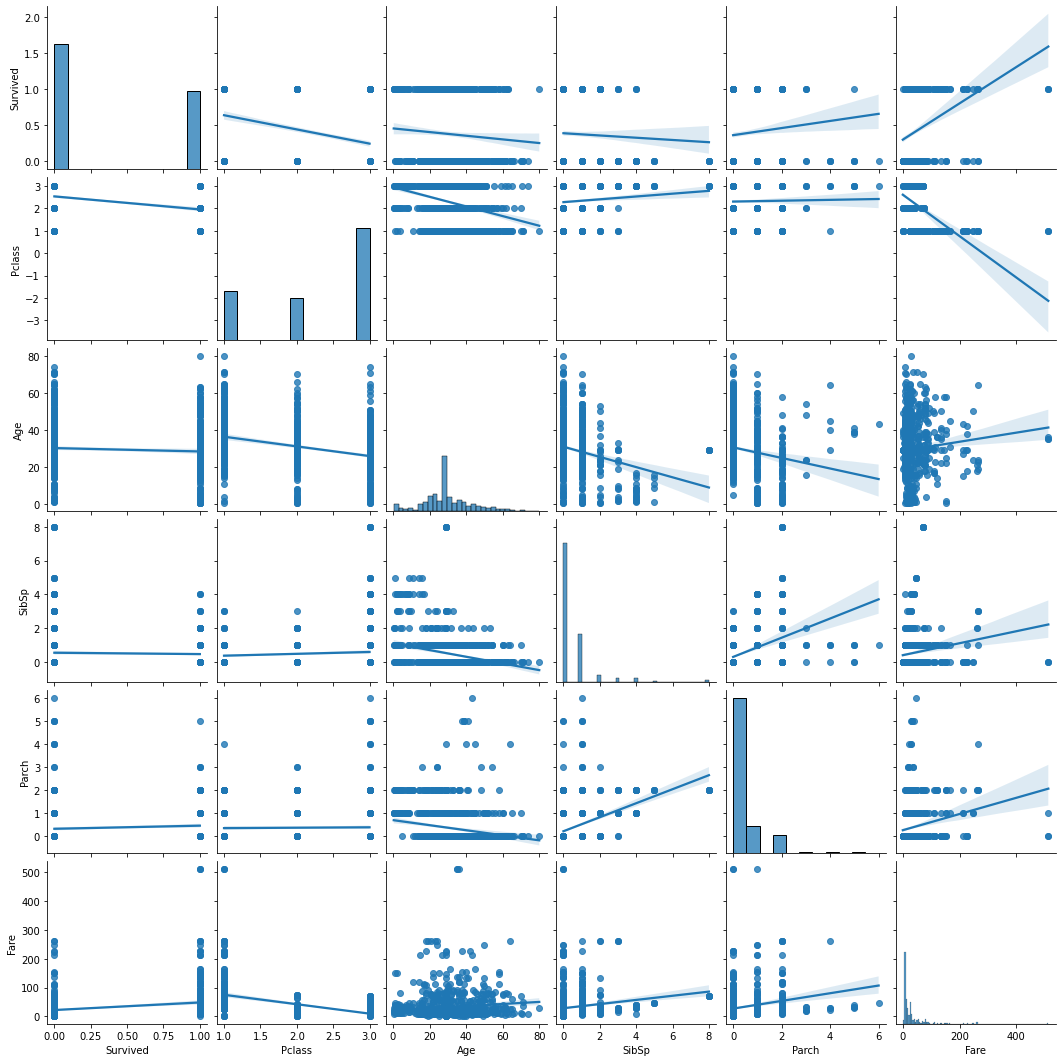

In [9]:
import seaborn as sns

data = train.iloc[:,:]
sns.pairplot(data, kind='reg')

In [10]:
#문자형 데이터 범주형으로

train.loc[train['Sex']=='male', 'Sex'] = 0
train.loc[train['Sex']=='female', 'Sex'] = 1
train['Sex'] = train['Sex'].astype('int64')
train.tail(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,0,2,0,27.0,0,0,13.00
887,1,1,1,19.0,0,0,30.00
888,0,3,1,29.0,1,2,23.45
889,1,1,0,26.0,0,0,30.00
890,0,3,0,32.0,0,0,7.75


In [11]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [12]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data = scaler.fit_transform(train)
# data = pd.DataFrame(data, columns=train.columns, index=list(train.index.values))
# data.head(3)


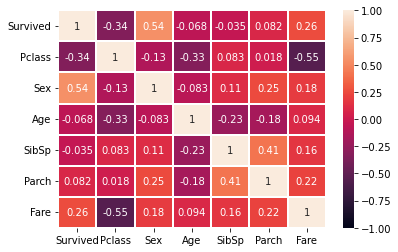

In [13]:
data = train.corr()
ax = sns.heatmap(data, linewidths=0.1, vmax=1, vmin=-1, annot=True)

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  f

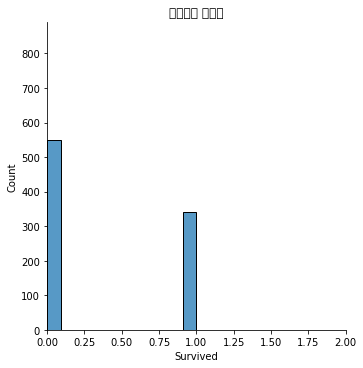

In [19]:
import matplotlib.pyplot as plt

sns.displot(train['Survived'], kde=False)
plt.axis([0, 2, 0, 890])
plt.title("타이타닉 생존자")
plt.show()

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import  accuracy_score

#model = XGBClassifier()

In [22]:
X = train.drop(['Survived','index'], axis=1)
y = train['Survived']

cnt=1
acc=0

for train_idx, valid_idx in skf.split(X,y):
    
    tain_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]
    
    model = XGBClassifier()
    
    train_X = train_data.drop('Survived', axis=1)
    train_y = train_data['Survived']
    
    model.fit(train_X, train_y)

    valid_X = valid_data.drop('Survived', axis=1)
    valid_y = valid_data['Survived']
#model.fit(X,y)

[15:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
test = pd.read_csv('test.csv')
test = test.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)
test.fillna({'Age' : int(test['Age'].mean())}, inplace=True)
test.loc[test['Sex']=='male', 'Sex'] = 0
test.loc[test['Sex']=='female', 'Sex'] = 1
test['Sex'] = test['Sex'].astype('int64')

pred = model.predict(test)

In [31]:
submission = pd.read_csv('submission.csv')
submission['Survived']=pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
